# Dataset python package
En este notebook se muestran las funcionalidades implementadas con una base de datos creada como ejemplo, probando primero con 2 atributos sueltos y luego con una base de datos creada a partir de esos dos atributos.

# Atributos

En este primer apartado vamos a usar los objetos atributos y algunas de sus funcionalidades, con las que trabajaremos luego con el objeto Dataset. Lo primero, creamos un atributo numérico y otro nominal para ver las diferentes opciones

In [1]:
import pandas as pd

from dataset.Attribute import Attribute
from dataset.Dataset import Dataset
from dataset.utils import roc, read_csv, create_log, write_log

a1 = Attribute([1,2,3,2,1,2,3,3,2,1,1], 'categoria')
a2 = Attribute(["dog", "dog", "cat", "wolve", "cat", "dog", "dog", "dog", "cat", "wolve", "dog"], "animal")

Una vez creado el atributo, vamos a probar algunas funcionalidades.


In [2]:
# Este método trata los datos como si fuesen categóricos
a1.entropy()

1.5726236638951638

In [3]:
a2.entropy()

1.4353713907745331

In [4]:
# Normalizar y estandarizar
a11 = a1.normalize()
a12 = a1.estandarize()
print(a11)


 Attribute object
 ----------------
 Name: categoria
 Size: 11
 Values: 
	[0.3333333333333333, 0.6666666666666666, 1.0, 0.6666666666666666, 0.3333333333333333, 0.6666666666666666, 1.0, 1.0, 0.6666666666666666, 0.3333333333333333, 0.3333333333333333]


In [5]:
print(a12)


 Attribute object
 ----------------
 Name: categoria
 Size: 11
 Values: 
	[-0.1326045377253587, 0.013260453772535857, 0.1591254452704304, 0.013260453772535857, -0.1326045377253587, 0.013260453772535857, 0.1591254452704304, 0.1591254452704304, 0.013260453772535857, -0.1326045377253587, -0.1326045377253587]


In [6]:
a1.variance()

0.628099173553719

In [7]:
a21 = a1.discretizeEF(3)
a22 = a1.discretizeEW(3)
print(a21[0])


 Attribute object
 ----------------
 Name: categoria
 Size: 11
 Values: 
	['(1,2)', '(1,2)', '(1,2)', '(1,2)', '(2,3)', '(2,3)', '(2,3)', '(2,3)', '(3,inf)', '(3,inf)', '(3,inf)']


In [8]:
print(a22[0])


 Attribute object
 ----------------
 Name: categoria
 Size: 11
 Values: 
	['(inf,1.6666666666666665)', '(1.6666666666666665,3.333333333333333)', '(1.6666666666666665,3.333333333333333)', '(1.6666666666666665,3.333333333333333)', '(inf,1.6666666666666665)', '(1.6666666666666665,3.333333333333333)', '(1.6666666666666665,3.333333333333333)', '(1.6666666666666665,3.333333333333333)', '(1.6666666666666665,3.333333333333333)', '(inf,1.6666666666666665)', '(inf,1.6666666666666665)']


# Dataset

Ahora, vamos a pasar a trabajar con el objeto Dataset. Reutilizamos los atributos a1 y a2 y les añadimos una clase, como si de clasificación supervisada se tratase.

In [9]:
# Definimos la clase de la base de datos
clase = ["a", "a", "b", "a", "b", "a", "b", "c","a","b", "a"]

d = Dataset()
d = d.add_column(a1.name, None)
d = d.add_column(a2.name, None)
print(len(d.columns))
for i in range(a1.size):
    d.append([a1.v[i], a2.v[i], clase[i]])
print(d)

2
Dataset object
------------------------
Size: 11

 Attribute object
 ----------------
 Name: categoria
 Size: 11
 Values: 
	[1, 2, 3, 2, 1, 2, 3, 3, 2, 1, 1]
 Attribute object
 ----------------
 Name: animal
 Size: 11
 Values: 
	['dog', 'dog', 'cat', 'wolve', 'cat', 'dog', 'dog', 'dog', 'cat', 'wolve', 'dog']
 Attribute object
 ----------------
 Name: target
 Size: 11
 Values: 
	['a', 'a', 'b', 'a', 'b', 'a', 'b', 'c', 'a', 'b', 'a']


In [10]:
d.col_var()

[0.628099173553719, None]

In [11]:
d.col_entropy()

[1.5726236638951638, 1.4353713907745331]

Vemos que hemos calculado la varianza y la entropía por cada columna. Para la varianza, no se puede calcular la varianza de una variable categórica, pero en el caso de la entropía, la variable numérica la trata como categórica. Ahora, vamos a discretizar, normalizar y estandarizar el dataset como antes.

In [12]:
print(d.estandarize_dataset())

Dataset object
------------------------
Size: 11

 Attribute object
 ----------------
 Name: categoria
 Size: 11
 Values: 
	[-0.1326045377253587, 0.013260453772535857, 0.1591254452704304, 0.013260453772535857, -0.1326045377253587, 0.013260453772535857, 0.1591254452704304, 0.1591254452704304, 0.013260453772535857, -0.1326045377253587, -0.1326045377253587]
 Attribute object
 ----------------
 Name: animal
 Size: 11
 Values: 
	['dog', 'dog', 'cat', 'wolve', 'cat', 'dog', 'dog', 'dog', 'cat', 'wolve', 'dog']
 Attribute object
 ----------------
 Name: target
 Size: 11
 Values: 
	['a', 'a', 'b', 'a', 'b', 'a', 'b', 'c', 'a', 'b', 'a']


Vemos que solo se ha modificado el atributo numérico.

In [13]:
print(d.normalize_dataset())

Dataset object
------------------------
Size: 11

 Attribute object
 ----------------
 Name: categoria
 Size: 11
 Values: 
	[-0.3458572319330373, 0.034585723193303754, 0.4150286783196448, 0.034585723193303754, -0.3458572319330373, 0.034585723193303754, 0.4150286783196448, 0.4150286783196448, 0.034585723193303754, -0.3458572319330373, -0.3458572319330373]
 Attribute object
 ----------------
 Name: animal
 Size: 11
 Values: 
	['dog', 'dog', 'cat', 'wolve', 'cat', 'dog', 'dog', 'dog', 'cat', 'wolve', 'dog']
 Attribute object
 ----------------
 Name: target
 Size: 11
 Values: 
	['a', 'a', 'b', 'a', 'b', 'a', 'b', 'c', 'a', 'b', 'a']


Vemos que en este caso, solo ha discretizado la columna numérica. También podemos sacar dos gráficas.

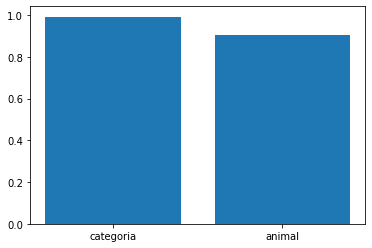

In [14]:
d.normalized_entropy_plot()

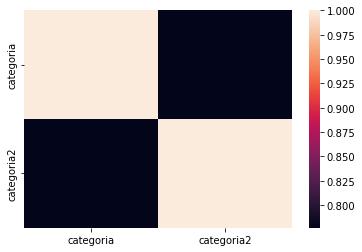

In [15]:
# Añadimos otro atributo numérico para que se pueda ver algo en la siguiente gráfica
c3 = [1,2,3,3,2,2,3,2,2,1,1]
d.add_column("categoria2", c3)
d.correlation_plot()

Como resultado del último plot, podemos ver un heatmap de correlación entre variables.

## Funciones extras

También se proveen algunas funciones extras para trabajar con logs o dibujar la curva roc. Para la curva roc, primero crearemos un dataframe en el que la primera columna será la probabilidad y la segunda la clase real.

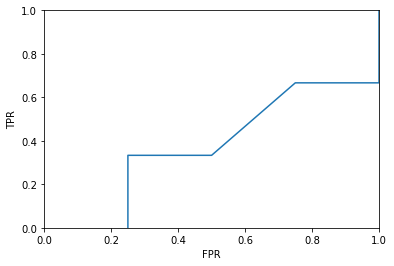

In [16]:
df = pd.DataFrame({"PROBS": [0.6,0.8,0.1,0.7,0.5,0.4,0.6,0.6,0.9,1], "CLASE": [True,True,True,False,False,True,True,False,True,False]})
roc(df)

Y por último, leer un csv y algunas funciones de log.

In [17]:
print(read_csv('iris.csv'))

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [18]:
# Creamos archivo miLog.log
create_log("miLog.log")
write_log("miLog.log", "Nuevo mensaje")
# Vemos que efectivamente sea escrito en el archivo
with open('miLog.log', "r") as f:
    text = f.read()
    print(text)


2022-01-03 - Nuevo mensaje
